In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from PIL import Image


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ellun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ellun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# PCA

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [3]:
df.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
import category_encoders as ce
Ft = pd.get_dummies(df['Fuel Type'],drop_first=True,prefix='Fuel')
df = df.drop(['Fuel Type'],axis=1)
df = pd.concat([df,Ft],axis=1)
Tr = pd.get_dummies(df['Transmission'],drop_first=True)
df = df.drop(['Transmission'],axis=1)
df = pd.concat([df,Tr],axis=1)

X = df.drop(['CO2 Emissions(g/km)','Fuel Consumption Comb (mpg)'],axis=1)
y = df['CO2 Emissions(g/km)']


x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

cat_cols = ['Make','Model','Vehicle Class']
target_enc = ce.CatBoostEncoder(cols = cat_cols)
target_enc.fit(x_train[cat_cols],y_train)

CatBoostEncoder(cols=['Make', 'Model', 'Vehicle Class'])

In [6]:
x_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel_E,Fuel_N,...,AS8,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7
3342,AUDI,A6 QUATTRO,MID-SIZE,2.0,4,10.9,7.5,9.4,0,0,...,1,0,0,0,0,0,0,0,0,0
502,HYUNDAI,ACCENT,COMPACT,1.6,4,8.8,6.3,7.7,0,0,...,0,0,0,0,0,0,0,0,0,0
6546,AUDI,S3,SUBCOMPACT,2.0,4,10.7,8.0,9.5,0,0,...,0,0,0,0,0,0,0,0,0,0
3398,BMW,440i COUPE,COMPACT,3.0,6,11.1,7.8,9.6,0,0,...,1,0,0,0,0,0,0,0,0,0
4103,MINI,COOPER 5 DOOR,SUBCOMPACT,1.5,3,8.8,6.8,7.9,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\ellun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

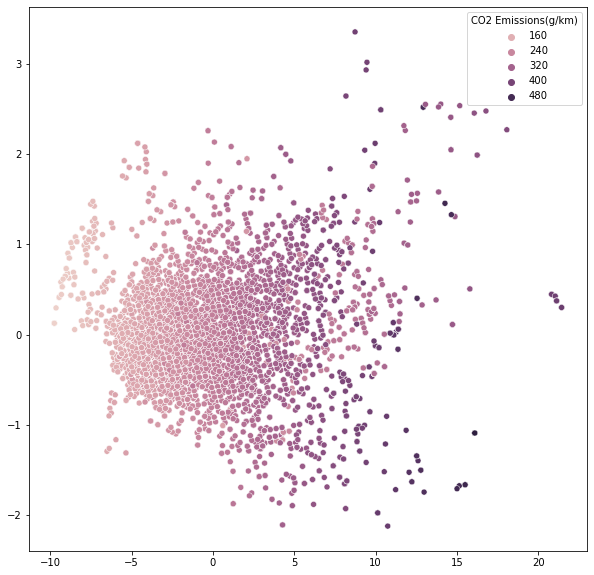

In [7]:
pca = PCA(n_components=2, svd_solver='full')
dx =df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
x_pca = pca.fit_transform(dx)
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=y)

# TSNE

C:\Users\ellun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

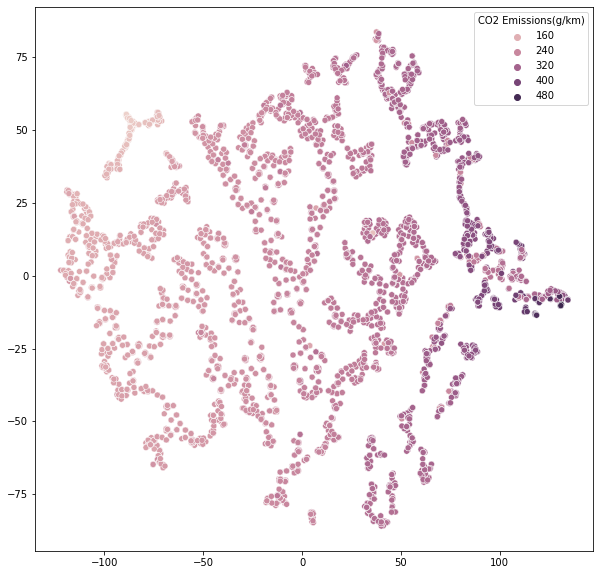

In [8]:
from sklearn.manifold import TSNE
ts = TSNE(n_components=2, init="pca")
x_tsne = ts.fit_transform(dx)
plt.figure(figsize=(10, 10))
sns.scatterplot(x_tsne[:, 0], x_tsne[:, 1], hue=y)

# IMAGE QUANTIZATION

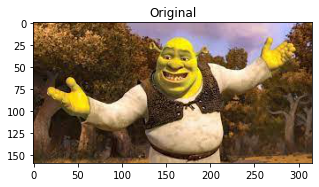

In [9]:
img = Image.open('shreck.png')
img_arr = np.array(img) / 255.
img_arr_2d = np.reshape(img_arr, (img_arr.shape[0] * img_arr.shape[1], 3))
img_arr_2d.shape
(1228800, 3)
fig = plt.figure(figsize=(5, 5))
plt.title('Original')
plt.imshow(img_arr)

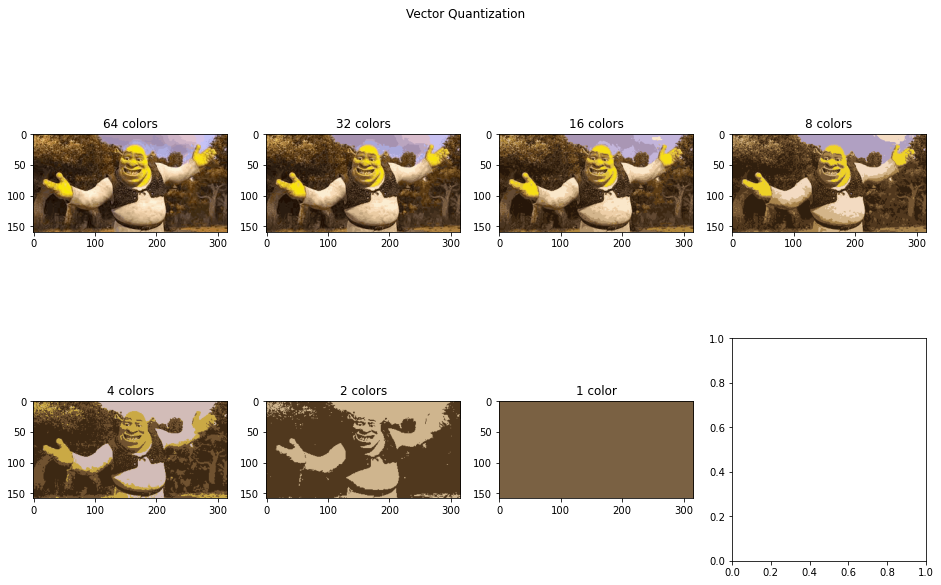

In [10]:
n_colors = [64, 32, 16, 8, 4, 2, 1]

fig, ax = plt.subplots(2, 4, figsize=(16, 9))
fig.suptitle('Vector Quantization')

for i, n in enumerate(n_colors):
    img_samples = shuffle(img_arr_2d, random_state=7, n_samples=10000)
    km = KMeans(n_clusters=n)
    km.fit(img_samples)
    labels = km.predict(img_arr_2d)
    # fig = plt.figure(figsize=(5, 5))
    idx = 0 if i < 4 else 1
    ax[idx][i % 4].set_title(f'{n} colors' if n > 1 else f'{n} color')
    ax[idx][i % 4].imshow(km.cluster_centers_[labels].reshape(img_arr.shape[0], img_arr.shape[1], -1))

# 2.2 Generate

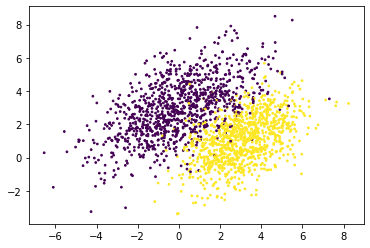

In [11]:
size = 1000

mean1 = [0, 3]
cov1 = [[4, 2], [2, 3]]
x1 = np.random.multivariate_normal(mean1, cov1, size)

mean2 = [3, 1]
cov2 = [[2, 1], [1,2]]
x2 = np.random.multivariate_normal(mean2, cov2, size)

X = np.concatenate([x1, x2])
y = np.array([0] * size + [1] * size)
X, y = shuffle(X, y, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=3, c=y)

In [12]:
for i in range(2, 10):
    gmm = GaussianMixture(n_components = i, covariance_type = 'full')
    gmm_labels = gmm.fit_predict(X)
    silhouette = silhouette_score(X, gmm_labels)
    print("n_clusters: ", i, " -- silhouette score: ", silhouette)
    

n_clusters:  2  -- silhouette score:  0.39724139506488304
n_clusters:  3  -- silhouette score:  0.3873832274706476
n_clusters:  4  -- silhouette score:  0.3734391894674739
n_clusters:  5  -- silhouette score:  0.3467824015210416
n_clusters:  6  -- silhouette score:  0.3111346272388462
n_clusters:  7  -- silhouette score:  0.31468029376498396
n_clusters:  8  -- silhouette score:  0.3250892036789093
n_clusters:  9  -- silhouette score:  0.32313154966116386


In [13]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)

means 
[[ 2.98390413  1.22877322]
 [-0.28700757  2.99253025]]


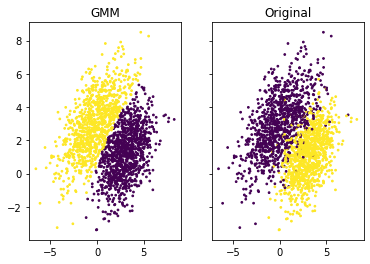

In [14]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y, s=3)

In [15]:
mean11 = GMM.means_[0]
cov11 = GMM.covariances_[0]
x11 = np.random.multivariate_normal(mean11, cov11, size)
mean21 = GMM.means_[1]
cov21 = GMM.covariances_[1]
x21 = np.random.multivariate_normal(mean21, cov21, size)
X1 = np.concatenate([x11, x21])
y1 = np.array([0] * size + [1] * size)
X1, y1 = shuffle(X1, y1, random_state=42)

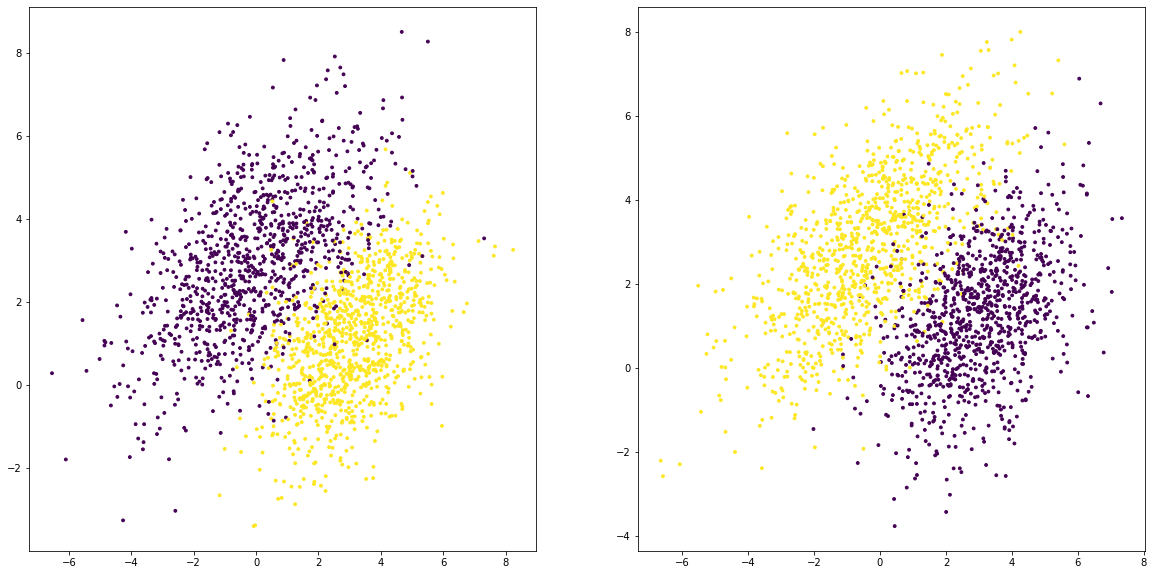

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=8, c=y)
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], s=8, c=y1)

# 3

In [17]:
df1 = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=["label", 'message'])
df1.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
print(len(df1[df1.label == 'ham']), 'Ham')
print(len(df1[df1.label == 'spam']), 'Spam')

4822 Ham
746 Spam


In [19]:
lemma = WordNetLemmatizer()
stopWords = stopwords.words('english')

In [20]:
## preprocessing
def normalizer(message):
    message = re.sub('[^a-zA-Z]', ' ', message).lower().split()
    message = [word for word in message if not word in set(stopwords.words('english'))]
    message = [lemma.lemmatize(word) for word in message]
    message = " ".join(message)
    return message

In [21]:
df1['normalized_text'] = df1.message.apply(normalizer)
df1.head()

,label,message,normalized_text
0,ham,I've been searching for the right words to tha...,searching right word thank breather promise wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


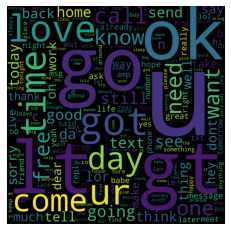

In [22]:
all_words = " ".join(df1.normalized_text)
spam_words = " ".join(df1[df1.label=='spam'].normalized_text)

wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

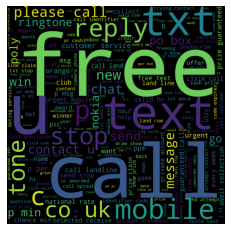

In [23]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(spam_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
corpus = [df1.normalized_text[i] for i in range(0,len(df1))]
cv = CountVectorizer(stop_words=stopwords.words('english'))


X = cv.fit_transform(corpus).toarray()
def encode_labels(x):
    if( x == 'spam'):
        return 1
    return 0

In [25]:
y = df1.label.apply(encode_labels).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [26]:

tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)
classifier2 =  RandomForestClassifier(n_estimators=200, max_depth=200).fit(X1_train, y1_train.astype(np.int64))


classifier2.fit(X1_train, y1_train)
RandomForestClassifier(max_depth=200, n_estimators=200)
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [27]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.912037037037037
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1608
           1       0.98      0.86      0.91       230

    accuracy                           0.98      1838
   macro avg       0.98      0.93      0.95      1838
weighted avg       0.98      0.98      0.98      1838

[[1603    5]
 [  33  197]]


# LDA

In [28]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

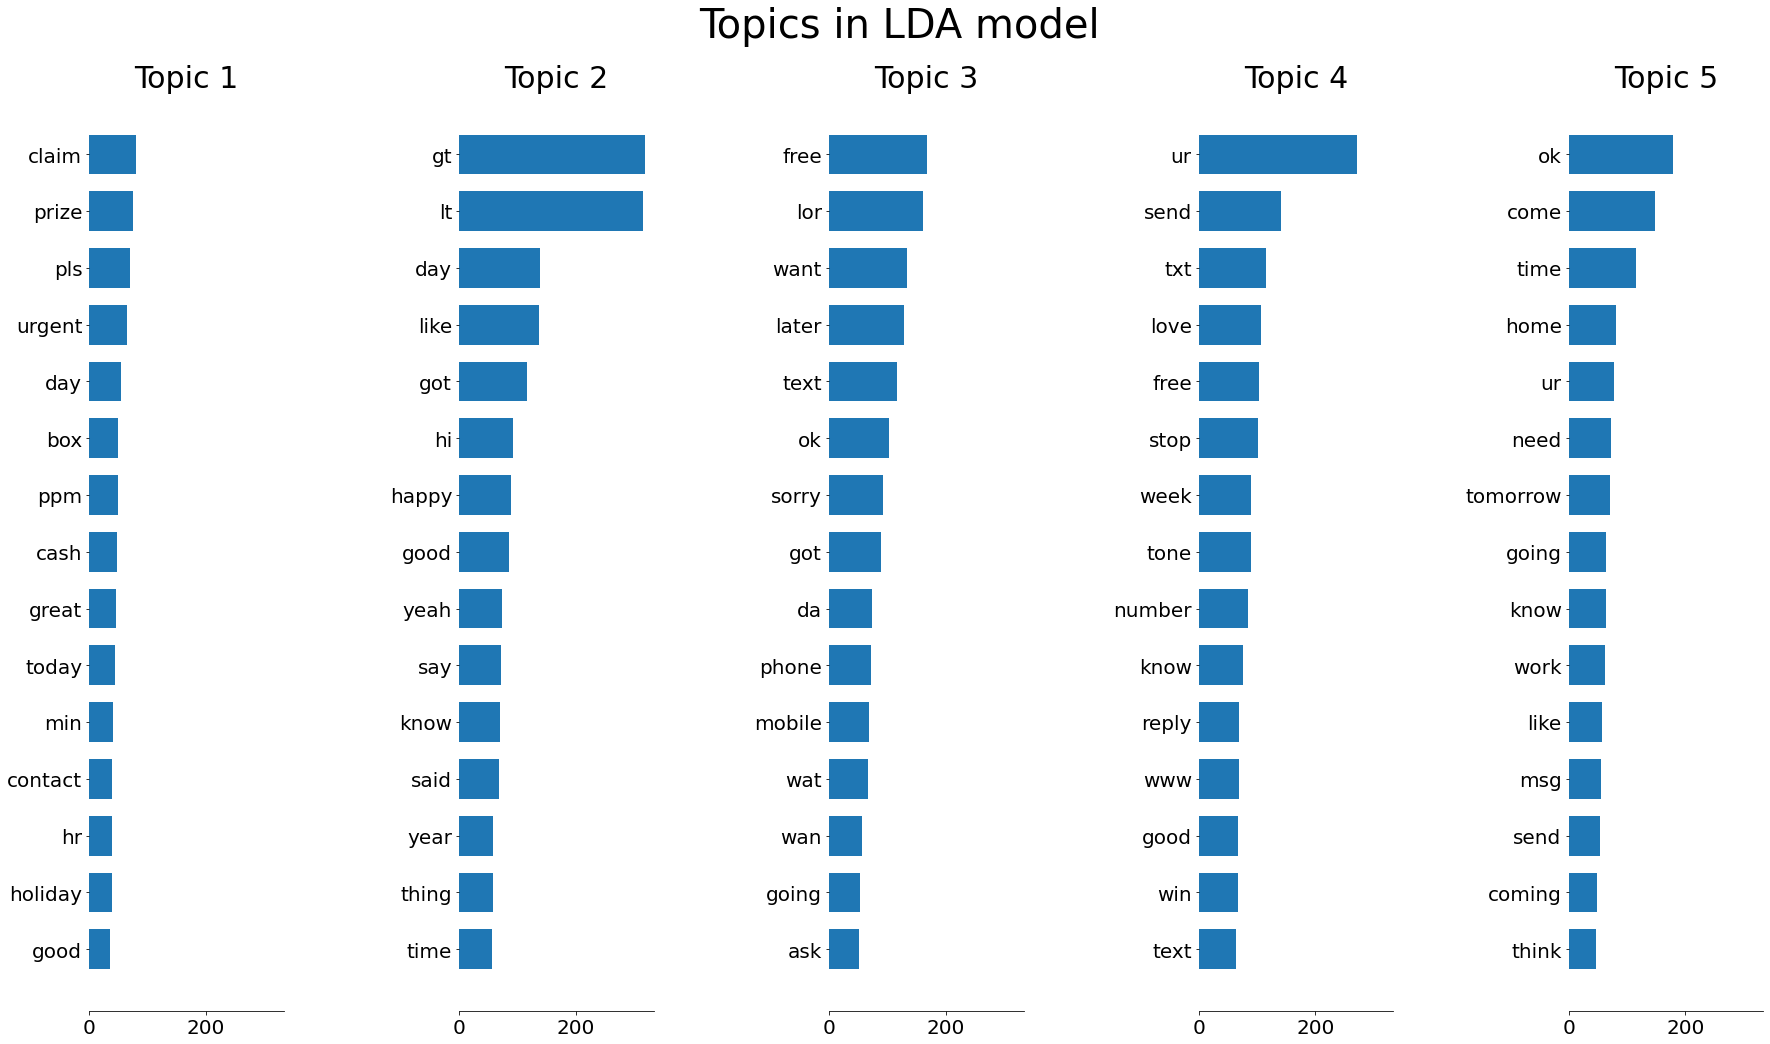

In [29]:
n_components = 5
n_top_words = 15
cv = CountVectorizer(stop_words='english')
vectorized = cv.fit_transform(corpus)
lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda.fit(vectorized)
feature_names = cv.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')